Script para dibujar en superficies de radio constante  repartidas uniformemente de r_min a r_max, cambiar el número de superficies con n_surfaces. Cambiar el snapshot con el índice i.

              
    | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 
    v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v

Number of snapshots found: 144


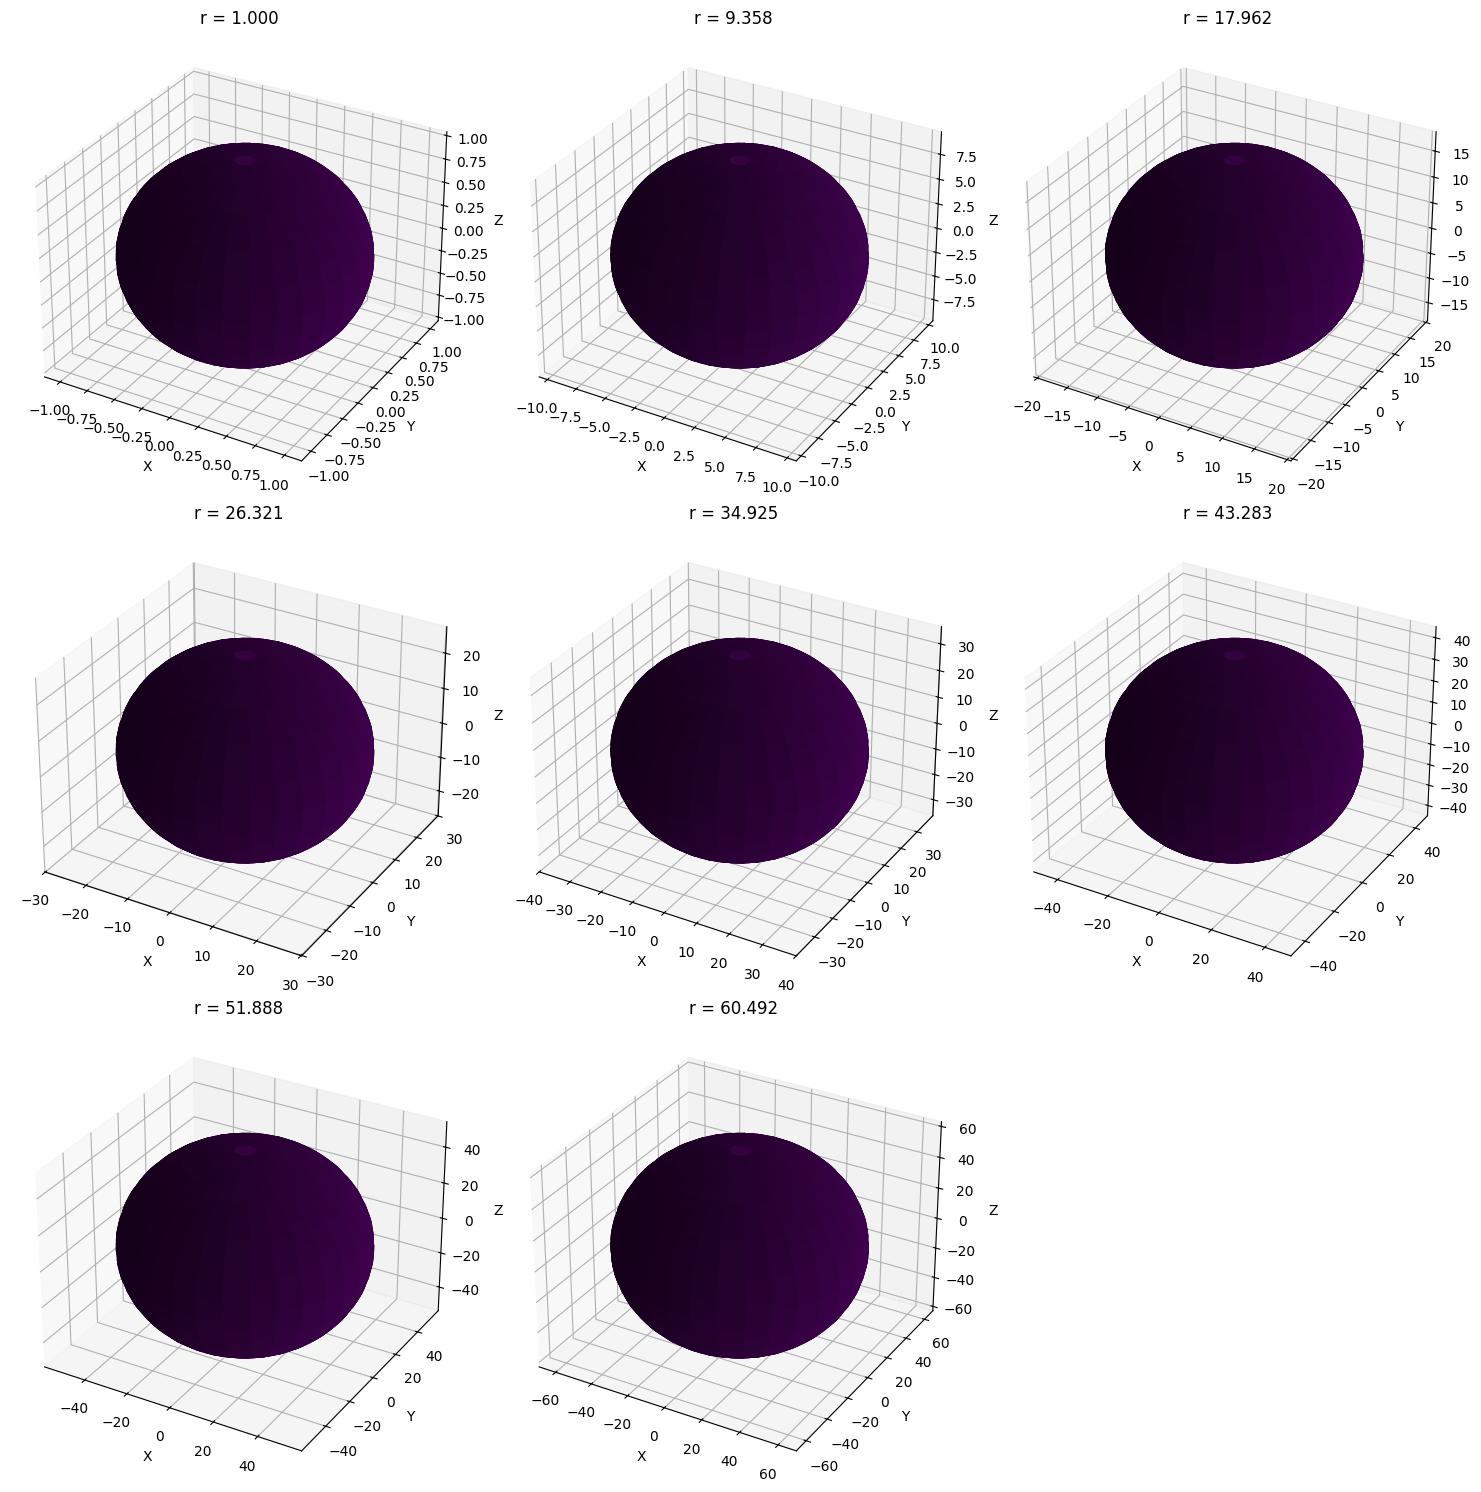

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

filename = "/home/flavio/Codes/KG/main/exe/test_6/phi.h5"
groupname = "/refinement_1"

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    r = g["Xcoord"][:].transpose()
    theta = g["Ycoord"][:].transpose()
    phi = g["Zcoord"][:].transpose()
    n_snapshots = len([k for k in g.keys() if k.startswith("phi_")])
    print(f"Number of snapshots found: {n_snapshots}")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

Nr = r.shape[0] - 1
Ntheta = theta.shape[0] - 1
Nphi = phi.shape[0] - 1

# Cambia n_surfaces para el número de superficies que quieras
n_surfaces = 8
i_r = np.linspace(0, Nr, n_surfaces, dtype=int)

i = 0  # Cambia este índice para seleccionar diferentes snapshots

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    phi_data = g[f"phi_{i}"][:].transpose()

# Calcula la distribución de subplots (lo más cuadrado posible)
ncols = math.ceil(np.sqrt(n_surfaces))
nrows = math.ceil(n_surfaces / ncols)

fig = plt.figure(figsize=(5*ncols, 5*nrows))

for j in range(n_surfaces):
    ax = fig.add_subplot(nrows, ncols, j+1, projection='3d')
    surf = ax.plot_surface(
        x[i_r[j], :, :],
        y[i_r[j], :, :],
        z[i_r[j], :, :],
        facecolors=plt.cm.viridis(phi_data[i_r[j], :, :]),
    )
    ax.set_title(f"r = {r[i_r[j],1,1]:.3f}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

Script para dibujar en superficies de phi constante y su commplementaria phi= constante + 2*pi repartidas uniformemente de 0 a 2*pi, cambiar el número de superficies con n_surfaces. Cambiar el snapshot con el índice i.

              
    | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 
    v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v

Number of snapshots found: 144


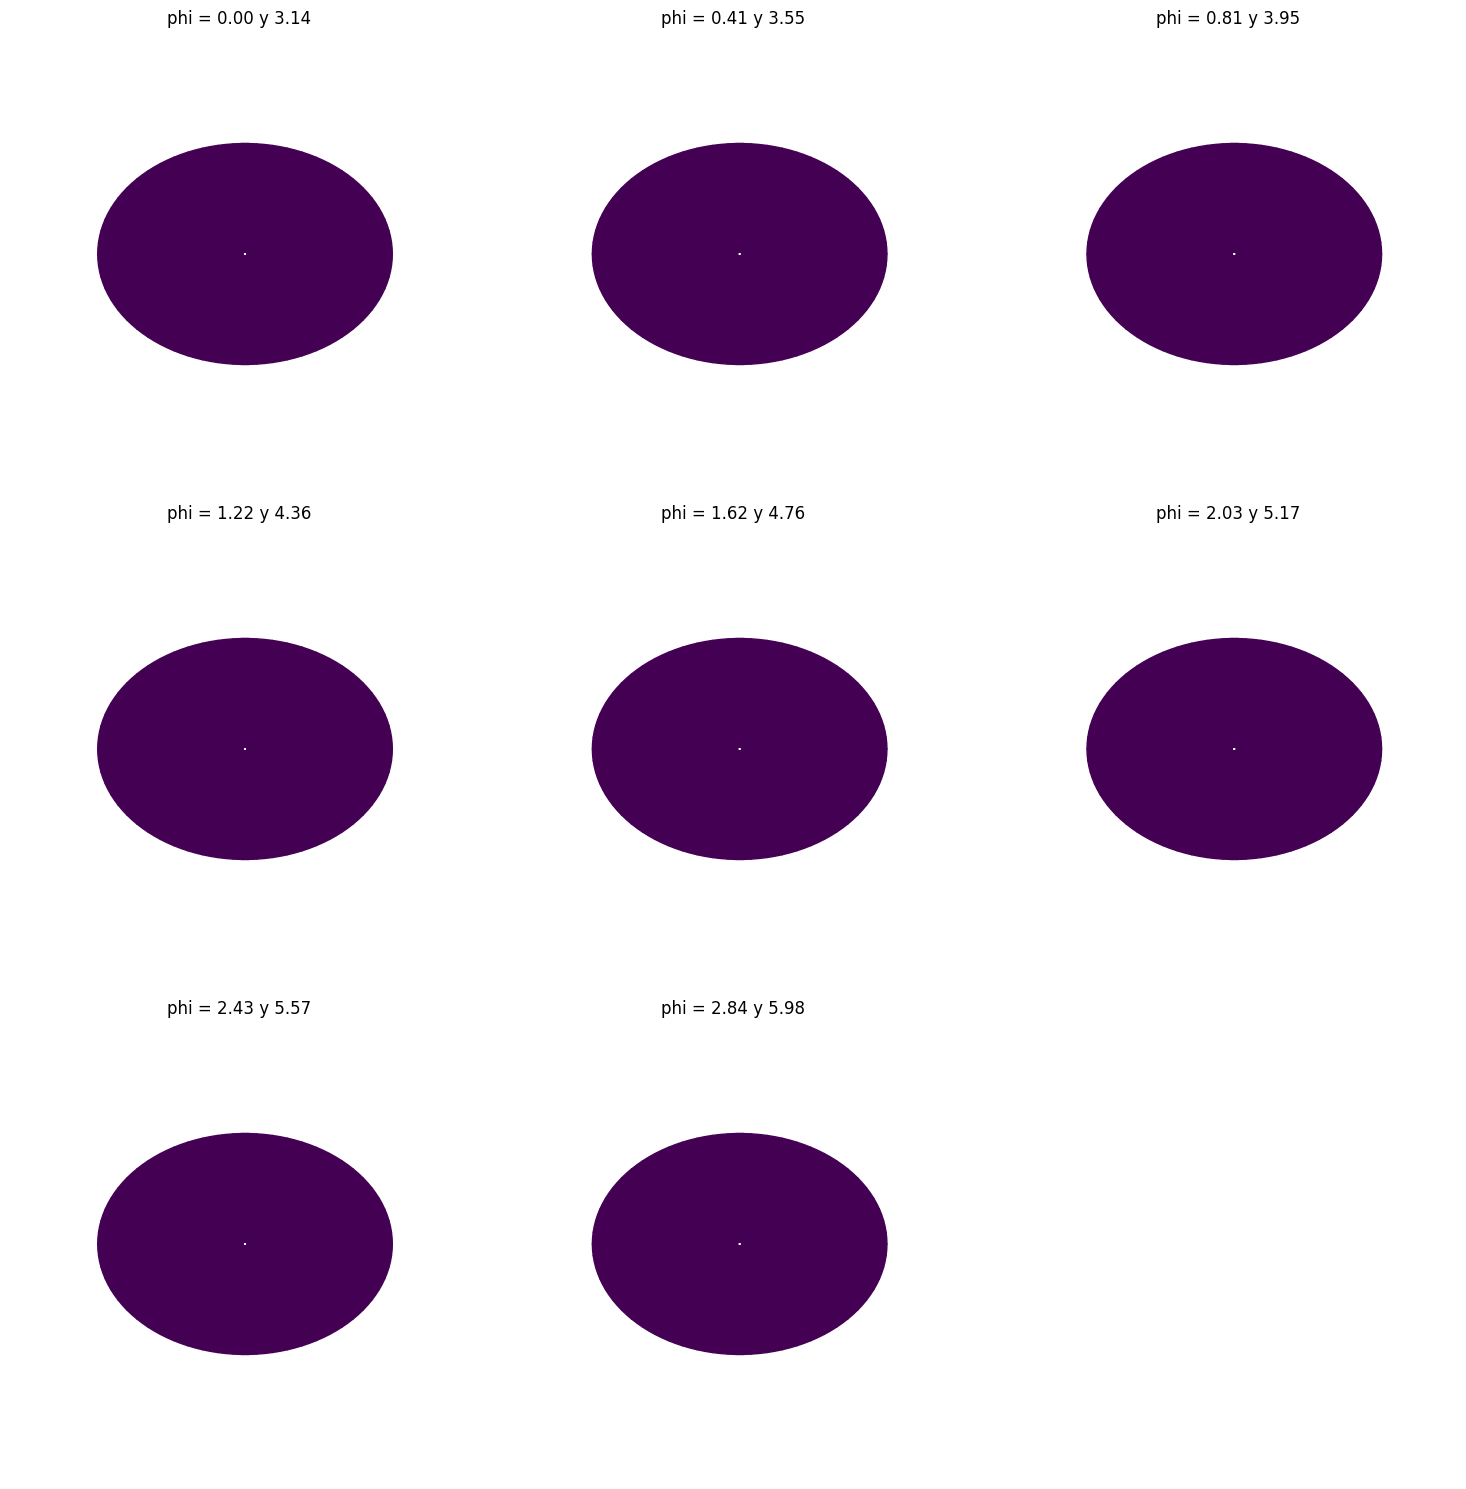

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

filename = "/home/flavio/Codes/KG/main/exe/test_6/phi.h5"
groupname = "/refinement_1"

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    r = g["Xcoord"][:].transpose()
    theta = g["Ycoord"][:].transpose()
    phi = g["Zcoord"][:].transpose()
    n_snapshots = len([k for k in g.keys() if k.startswith("phi_")])
    print(f"Number of snapshots found: {n_snapshots}")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

Nphi = phi.shape[2]
n_surfaces = 8  # Cambia este valor para el número de superficies que quieras
n_surfaces =  n_surfaces*2

i_phi = np.linspace(0, Nphi-1, n_surfaces, dtype=int)

i = 4  # Cambia este índice para seleccionar diferentes snapshots

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    phi_data = g[f"phi_{i}"][:].transpose()

n_panels = n_surfaces // 2
ncols = math.ceil(np.sqrt(n_panels))
nrows = math.ceil(n_panels / ncols)

fig = plt.figure(figsize=(5*ncols, 5*nrows))

for j in range(n_panels):
    ax = fig.add_subplot(nrows, ncols, j+1, projection='3d')
    # Primer phi=cte
    surf1 = ax.plot_surface(
        x[:, :, i_phi[j]],
        y[:, :, i_phi[j]],
        z[:, :, i_phi[j]],
        facecolors=plt.cm.viridis(phi_data[:, :, i_phi[j]]),
        shade=False,
    )
    # Su opuesto (phi=cte+pi o phi=cte+Nphi//2)
    idx_opuesto = (i_phi[j] + Nphi//2) % Nphi
    surf2 = ax.plot_surface(
        x[:, :, idx_opuesto],
        y[:, :, idx_opuesto],
        z[:, :, idx_opuesto],
        facecolors=plt.cm.viridis(phi_data[:, :, idx_opuesto]),
        shade=False,
    )
    ax.set_title(f"phi = {phi[1,1,i_phi[j]]:.2f} y {phi[1,1,idx_opuesto]:.2f}")
    ax.set_axis_off()  # <-- Oculta ejes y fondo
    phi_deg = np.degrees(phi[1,1,i_phi[j]])
    ax.view_init(elev=0, azim=phi_deg + 90)  # Ajusta la vista para que sea ortogonal
    ax.set_proj_type('ortho')  
    max_range = np.array([
    x[:, :, i_phi[j]].max() - x[:, :, i_phi[j]].min(),
    y[:, :, i_phi[j]].max() - y[:, :, i_phi[j]].min(),
    z[:, :, i_phi[j]].max() - z[:, :, i_phi[j]].min()
    ]).max() / 2.0

    mid_x = (x[:, :, i_phi[j]].max() + x[:, :, i_phi[j]].min()) * 0.5
    mid_y = (y[:, :, i_phi[j]].max() + y[:, :, i_phi[j]].min()) * 0.5
    mid_z = (z[:, :, i_phi[j]].max() + z[:, :, i_phi[j]].min()) * 0.5

    ax.set_xlim(- max_range, + max_range)
    ax.set_ylim(- max_range, + max_range)
    ax.set_zlim(- max_range, + max_range)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

Script para dibujar en superficies de theta constante  repartidas uniformemente de 0 a pi, cambiar el número de superficies con n_surfaces. Cambiar el snapshot con el índice i.

              
    | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | 
    v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v v

Number of snapshots found: 144


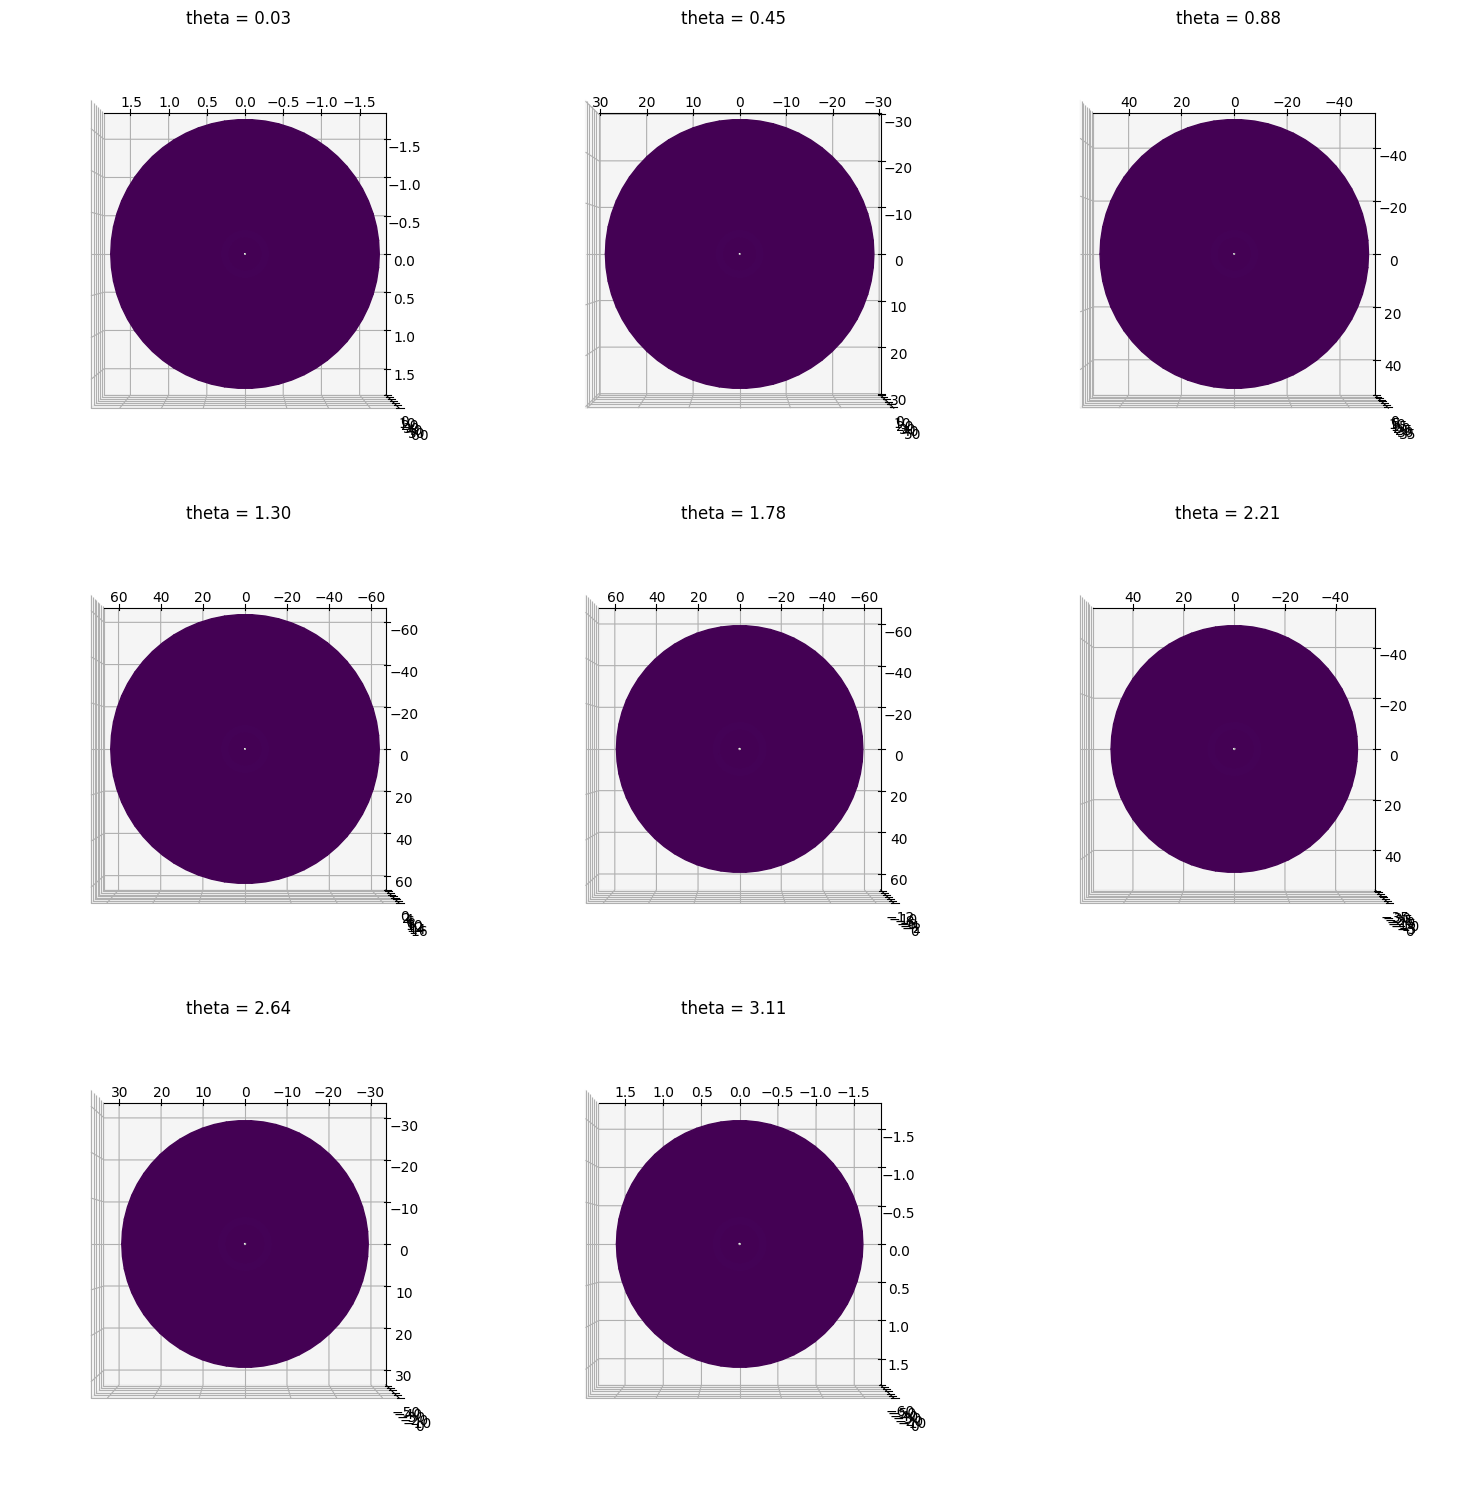

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

filename = "/home/flavio/Codes/KG/main/exe/test_6/phi.h5"
groupname = "/refinement_1"

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    r = g["Xcoord"][:].transpose()
    theta = g["Ycoord"][:].transpose()
    phi = g["Zcoord"][:].transpose()
    n_snapshots = len([k for k in g.keys() if k.startswith("phi_")])
    print(f"Number of snapshots found: {n_snapshots}")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

Ntheta = theta.shape[1]
n_surfaces = 8  # Cambia este valor para el número de cortes theta=cte que quieras
i_theta = np.linspace(1, Ntheta-2, n_surfaces, dtype=int)

i = 0  # Cambia este índice para seleccionar diferentes snapshots

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    phi_data = g[f"phi_{i}"][:].transpose()

ncols = math.ceil(np.sqrt(n_surfaces))
nrows = math.ceil(n_surfaces / ncols)

fig = plt.figure(figsize=(5*ncols, 5*nrows))

for j in range(n_surfaces):
    ax = fig.add_subplot(nrows, ncols, j+1, projection='3d')
    surf = ax.plot_surface(
        x[:, i_theta[j], :],
        y[:, i_theta[j], :],
        z[:, i_theta[j], :],
        facecolors=plt.cm.viridis(phi_data[:, i_theta[j], :]),
        shade=False,
    )
    ax.set_title(f"theta = {theta[1,i_theta[j],1]:.2f}")
    # Vista ortogonal al plano theta=cte
    ax.view_init(elev=90, azim= 90)  # Ajusta la vista para que sea ortogonal

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
import imageio.v2 as imageio
import os
import shutil

filename = "/home/flavio/Codes/KG/main/exe/test_6/phi.h5"
groupname = "/refinement_1"

with h5py.File(filename, 'r') as f:
    g = f[groupname]
    r = g["Xcoord"][:].transpose()
    theta = g["Ycoord"][:].transpose()
    phi = g["Zcoord"][:].transpose()
    n_snapshots = len([k for k in g.keys() if k.startswith("phi_")])
    print(f"Number of snapshots found: {n_snapshots}")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

Nr = r.shape[0] - 1
n_surfaces = 8
i_r = np.linspace(0, Nr, n_surfaces, dtype=int)

# Subplots
ncols = math.ceil(np.sqrt(n_surfaces))
nrows = math.ceil(n_surfaces / ncols)

# Carpeta temporal para imágenes
os.makedirs("frames_r", exist_ok=True)
filenames = []

for i in range(n_snapshots):
    with h5py.File(filename, 'r') as f:
        g = f[groupname]
        phi_data = g[f"phi_{i}"][:].transpose()

    fig = plt.figure(figsize=(5*ncols, 5*nrows))
    for j in range(n_surfaces):
        ax = fig.add_subplot(nrows, ncols, j+1, projection='3d')
        surf = ax.plot_surface(
            x[i_r[j], :, :],
            y[i_r[j], :, :],
            z[i_r[j], :, :],
            facecolors=plt.cm.viridis(phi_data[i_r[j], :, :]),
            shade=False,
        )
        ax.set_title(f"r = {r[i_r[j],1,1]:.3f}")
        ax.set_axis_off()
        ax.set_proj_type('ortho')
    plt.tight_layout()
    fname = f"frames_r/frame_{i:04d}.png"
    plt.savefig(fname)
    plt.close(fig)
    filenames.append(fname)

# Crear el video
with imageio.get_writer('video_r.mp4', fps=5) as writer:
    for fname in filenames:
        image = imageio.imread(fname)
        writer.append_data(image)

# Limpiar imágenes temporales
shutil.rmtree("frames_r")

Number of snapshots found: 144


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1500) to (1504, 1504) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
